<a href="https://colab.research.google.com/github/Patel-Aman/data_science_basics/blob/main/IML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving candy-data.csv to candy-data.csv
User uploaded file "candy-data.csv" with length 5205 bytes


# **Logistic Regression**

- Used when the dependent variable is categorical
- We predict dependent data, given a set of independent variables




#### Why do we use Logistic Regression ?

In [ ]:
# from google.colab.patches import cv2_imshow

# img = cv2.imread("log.jpeg")
# cv2_imshow(img)

- Logistic regression is used to calculate the probability of a binary event occurring
- Used to predict the likelihood of all kinds of “yes” or “no” outcomes



#### Sigmoid  / Logistic Function

$p =1 / (1 + e^{-y})$

- An S shaped function
- Values lie between 0 and 1.

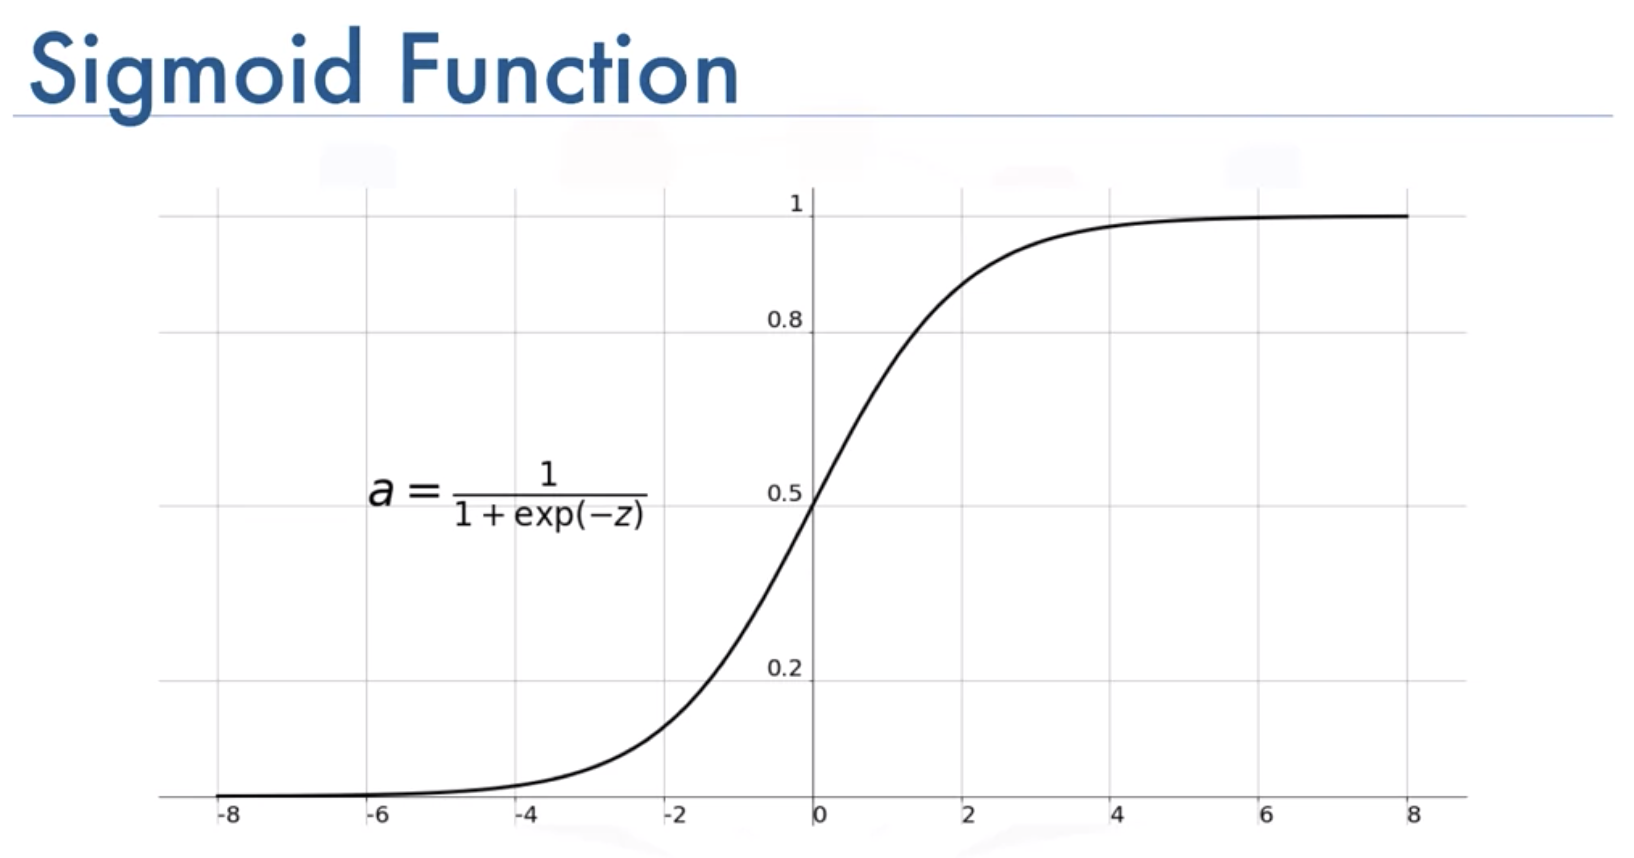

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("sig.png")
cv2_imshow(img)

#### Characteriaitics
- Easier to train and implement as compared to other methods.
- Works well for cases where the dataset is linearly separable.
- Too small sample size leads to overfitting.

#### Data
We have to find whether the candy is chocolate or not.

The dataset is taken from -

https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv

In [ ]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [ ]:
# # Built in colab with local data upload

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving log.jpeg to log.jpeg
User uploaded file "log.jpeg" with length 22678 bytes


In [ ]:
# Explore data

df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8')))
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]

df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [ ]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [ ]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

In [ ]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test

X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_test = test_df["chocolate"]



In [ ]:
y_test.head()

2     0
75    1
63    0
5     1
36    1
Name: chocolate, dtype: int64

In [ ]:
y_train.value_counts()

0    40
1    28
Name: chocolate, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


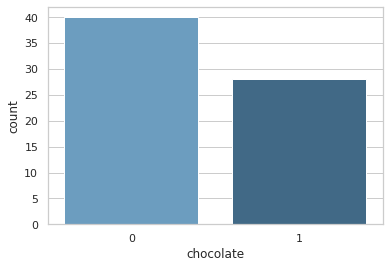

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot("chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate", pct_of_choc*100)


percentage of no chocolate is 58.82352941176471
percentage of chocolate 41.17647058823529


In [ ]:
train_df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.750000,0.10,0.050000,0.025000,0.00,0.225000,0.025000,0.650000,0.463400,0.335575,42.140953
1,0.035714,0.25,0.285714,0.107143,0.25,0.035714,0.571429,0.357143,0.488214,0.647357,60.836091


In [ ]:
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.526316,0.140351,0.035088,0.070175,0.157895,0.192982,0.596491,0.448211,0.436298,49.152308,0.368421
1,0.090909,0.181818,0.181818,0.272727,0.090909,0.545455,0.181818,0.605273,0.607273,53.397008,0.636364


### Model Development and Prediction
Import the Scikit Learn Logistic Regression module
Fit model on the train set using fit() then perform prediction on test set using prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7, 1],
       [3, 6]])

### Visualize CFM (confusion matrix) using a heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

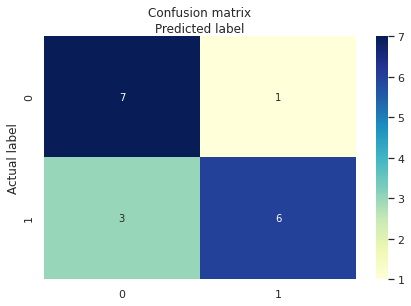

In [ ]:
 class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7647058823529411
Precision: 0.8571428571428571
Recall: 0.6666666666666666
